# Task 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.stats import weightstats as stests

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('test1.csv')

In [ ]:
df

group  client_id     target
0        test          1  48.294046
1        test          2  50.561098
2        test          3  50.987911
3        test          4  47.819840
4        test          5  50.153417
...       ...        ...        ...
1993  control       1994  50.207788
1994  control       1995  51.715447
1995  control       1996  56.551077
1996  control       1997  47.178478
1997  control       1998  49.434447

[1998 rows x 3 columns]

In [ ]:
test_bins = math.ceil(1+math.log2(df.loc[df['group']=='test']['client_id'].count()))
control_bins = math.ceil(1+math.log2(df.loc[df['group']=='control']['client_id'].count()))

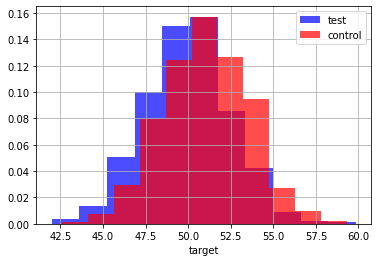

In [ ]:
plt.axes(xlabel='target')
df.loc[df['group']=='test']['target'].hist(density=True, color='blue', alpha=0.7, label='test',bins=test_bins)
df.loc[df['group']=='control']['target'].hist(density=True, color='red', alpha=0.7, label='control',bins=control_bins)
plt.legend()

In [ ]:
test_vals = df.loc[df['group']=='test']['target'].values
control_vals = df.loc[df['group']=='control']['target'].values

In [ ]:
tstat, p_val = stests.ztest(x1=test_vals,x2=control_vals, value=test_vals.mean()-control_vals.mean(), alternative='two-sided')

In [ ]:
print(tstat, p_val)

0.0 1.0


# Task 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.stats import weightstats as stests
from scipy.stats import wilcoxon

In [ ]:
df = pd.read_csv('test2.csv')
df

group  client_id     avg_sum
0       test          1  156.686451
1       test          2  342.625859
2       test          3   79.712120
3       test          4  493.110807
4       test          5  124.135016
..       ...        ...         ...
595  control        596  209.075972
596  control        597   57.990291
597  control        598   42.577037
598  control        599  178.320097
599  control        600   78.746824

[600 rows x 3 columns]

In [ ]:
test_bins = math.ceil(1+math.log2(df.loc[df['group']=='test']['client_id'].count()))
control_bins = math.ceil(1+math.log2(df.loc[df['group']=='control']['client_id'].count()))

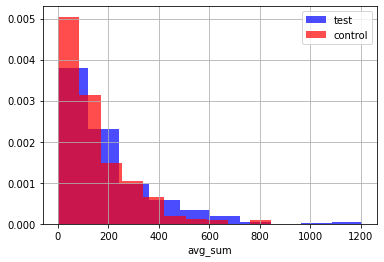

In [ ]:
plt.axes(xlabel='avg_sum')
df.loc[df['group']=='test']['avg_sum'].hist(density=True, color='blue', alpha=0.7, label='test',bins=test_bins)
df.loc[df['group']=='control']['avg_sum'].hist(density=True, color='red', alpha=0.7, label='control',bins=control_bins)
plt.legend()

In [ ]:
y = df.loc[df['group']=='test']['avg_sum'].values
x = df.loc[df['group']=='control']['avg_sum'].values
y_n = df.loc[df['group']=='test']['client_id'].count()
x_n = df.loc[df['group']=='control']['client_id'].count()
y_n-12, x_n

(294, 294)

In [ ]:
wilcoxon(x, y[:-12], alternative='greater')

WilcoxonResult(statistic=17831.0, pvalue=0.9958539011852073)

# Task 3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
df = pd.read_csv('test3.csv')
df

group  client_id  click_flg
0         test          1          1
1         test          2          0
2         test          3          0
3         test          4          1
4         test          5          1
...        ...        ...        ...
20028  control      20029          0
20029  control      20030          1
20030  control      20031          1
20031  control      20032          0
20032  control      20033          0

[20033 rows x 3 columns]

In [ ]:
test_bins = math.ceil(1+math.log2(df.loc[df['group']=='test']['client_id'].count()))
control_bins = math.ceil(1+math.log2(df.loc[df['group']=='control']['client_id'].count()))

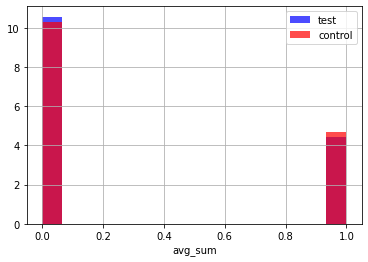

In [ ]:
plt.axes(xlabel='avg_sum')
df.loc[df['group']=='test']['click_flg'].hist(density=True, color='blue', alpha=0.7, label='test',bins=test_bins)
df.loc[df['group']=='control']['click_flg'].hist(density=True, color='red', alpha=0.7, label='control',bins=control_bins)
plt.legend()

In [ ]:
y = df.loc[df['group']=='test']['click_flg'].values
x = df.loc[df['group']=='control']['click_flg'].values
y_n = df.loc[df['group']=='test']['client_id'].count()
x_n = df.loc[df['group']=='control']['client_id'].count()
y_n-13, x_n

(10010, 10010)

In [ ]:
proportions_ztest(count=[sum(x), sum(y)], nobs=[len(x), len(y)], alternative='larger') 

(2.595183244634136, 0.004727025006220821)